In [1]:
import os 
import sys 

sys.path.insert(0, '..')

In [2]:
from bio_check import Verifier
from pprint import pp

In [3]:
sbml_fp = "../model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml"
omex_fp = sbml_fp.replace("/BIOMD0000000012_url.xml", ".omex")
report_fp = omex_fp.replace(".omex", "/reports.h5")
duration = 10
nsteps = 100 
comparison_id = "test_notebook_sbml0"
simulators = ["copasi", "tellurium"]
selection_list = ["cI mRNA"]

In [4]:
verify = Verifier()

{'bio-check-message': 'Hello from the Verification Service API!'}


In [5]:
# inspect public methods and attributes

_dir = dir(verify)

for m in _dir:
    print(m) if not m.startswith("_") else None

data
endpoint_root
export_csv
get_compatible
get_verify_output
select_observables
verify_omex
verify_sbml
visualize


In [6]:
# submit a new verification 

submission_1 = verify.verify_sbml(sbml_filepath=sbml_fp, comparison_id=comparison_id, duration=duration, number_of_steps=nsteps, simulators=simulators)

In [7]:
submission_1

RequestError(error='422 Client Error: Unprocessable Entity for url: https://biochecknet.biosimulations.org/verify-sbml')

In [5]:
submission_2 = verify.verify_omex(omex_filepath=omex_fp, comparison_id=comparison_id, truth=report_fp)

Selection list: None


In [6]:
submission_2

{'job_id': 'utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8',
 'status': 'PENDING',
 'timestamp': '2024-08-01 16:02:03.886108',
 'comparison_id': None,
 'path': 'uploads/utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8/Elowitz-Nature-2000-Repressilator.omex',
 'simulators': ['amici', 'copasi', 'tellurium'],
 'ground_truth_report_path': None,
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

In [7]:
# use job id generated from submission to poll gateway

omex_job_id = submission_2['job_id']

verify.get_verify_output(omex_job_id)

{'content': {'status': 'PENDING',
  'job_id': 'utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8',
  'path': 'uploads/utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8/Elowitz-Nature-2000-Repressilator.omex',
  'simulators': ['amici', 'copasi', 'tellurium'],
  'timestamp': '2024-08-01 16:02:03.886108',
  'ground_truth_report_path': None,
  'include_outputs': True,
  'rTol': None,
  'aTol': None,
  'selection_list': None}}

In [8]:
# we can call this multiple times until ready

verify.get_verify_output(omex_job_id)

{'content': {'status': 'PENDING',
  'job_id': 'utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8',
  'path': 'uploads/utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8/Elowitz-Nature-2000-Repressilator.omex',
  'simulators': ['amici', 'copasi', 'tellurium'],
  'timestamp': '2024-08-01 16:02:03.886108',
  'ground_truth_report_path': None,
  'include_outputs': True,
  'rTol': None,
  'aTol': None,
  'selection_list': None}}

In [9]:
output = verify.get_verify_output(omex_job_id)

In [10]:
pp(output)

{'content': {'status': 'PENDING',
             'job_id': 'utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8',
             'path': 'uploads/utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8/Elowitz-Nature-2000-Repressilator.omex',
             'simulators': ['amici', 'copasi', 'tellurium'],
             'timestamp': '2024-08-01 16:02:03.886108',
             'ground_truth_report_path': None,
             'include_outputs': True,
             'rTol': None,
             'aTol': None,
             'selection_list': None}}


{'content': {'job_id': 'utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8',
  'status': 'COMPLETED',
  'timestamp': '2024-08-01 16:04:53.987044',
  'results': {'results': {'LacI protein': {'mse': {'amici': {'amici': 0.0,
       'copasi': 2850497.1348808077,
       'tellurium': 0.00044158302559360634},
      'copasi': {'amici': 2850497.1348808077,
       'copasi': 0.0,
       'tellurium': 2850499.805138773},
      'tellurium': {'amici': 0.00044158302559360634,
       'copasi': 2850499.805138773,
       'tellurium': 0.0}},
     'proximity': {'amici': {'amici': True,
       'copasi': False,
       'tellurium': True},
      'copasi': {'amici': False, 'copasi': True, 'tellurium': False},
      'tellurium': {'amici': True, 'copasi': False, 'tellurium': True}},
     'output_data': {'amici': [1971.2685725983274,
       2056.478842725034,
       2133.4750014522638,
       2200.7609953341134,
       2256.9624325043765,
       2300.8927338252797,
       2331.620371915326,
       2348.52984

In [10]:
# use selection list to return only one observable

selection_list = ["cI mRNA"]

submission_3 = verify.verify_omex(omex_filepath=omex_fp, comparison_id="notebook_test_omex2", truth=report_fp, selection_list=selection_list)

Selection list: ['cI mRNA']


In [12]:
submission_3

{'job_id': 'utc_comparison_13f90f11-0782-4cfe-9201-12d3354dcf59',
 'status': 'PENDING',
 'timestamp': '2024-07-31 18:19:29.952549',
 'comparison_id': 'utc_comparison',
 'path': 'uploads/utc_comparison_13f90f11-0782-4cfe-9201-12d3354dcf59/Elowitz-Nature-2000-Repressilator.omex',
 'simulators': ['amici', 'copasi', 'tellurium'],
 'ground_truth_report_path': None,
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

In [13]:
verify.verify_omex(omex_filepath=omex_fp, comparison_id="notebook_test_omex2", truth=report_fp, selection_list=selection_list)

Selection list: ['cI mRNA']


{'job_id': 'utc_comparison_e50a4894-3ac5-4263-ac2c-734149cfac31',
 'status': 'PENDING',
 'timestamp': '2024-07-31 18:23:05.460839',
 'comparison_id': 'utc_comparison',
 'path': 'uploads/utc_comparison_e50a4894-3ac5-4263-ac2c-734149cfac31/Elowitz-Nature-2000-Repressilator.omex',
 'simulators': ['amici', 'copasi', 'tellurium'],
 'ground_truth_report_path': None,
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

In [14]:
import requests 

job_id = 'utc_comparison_e50a4894-3ac5-4263-ac2c-734149cfac31'
piece = f'fetch-results/{job_id}'
endpoint = verify._format_endpoint(piece)
headers = {'Accept': 'application/json'}
try:
    response = requests.get(endpoint, headers=headers)
    verify._check_response(response)
    data = response.json()
    verify.data[job_id] = data
    print(data)
except Exception as e:
    print(str(e))

{'content': {'status': 'PENDING', 'job_id': 'utc_comparison_e50a4894-3ac5-4263-ac2c-734149cfac31', 'path': 'uploads/utc_comparison_e50a4894-3ac5-4263-ac2c-734149cfac31/Elowitz-Nature-2000-Repressilator.omex', 'simulators': ['amici', 'copasi', 'tellurium'], 'comparison_id': 'utc_comparison', 'timestamp': '2024-07-31 18:23:05.460839', 'ground_truth_report_path': None, 'include_outputs': True, 'rTol': None, 'aTol': None, 'selection_list': None}}


In [16]:
test_data = verify.get_verify_output(omex_job_id)

test_data['content']['results']['results']['cI mRNA']['output_data'].keys()

dict_keys(['amici', 'copasi', 'tellurium'])

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt


def visualize(data: dict):
    """Visualize simulation output data, not comparison data!"""
    plt.figure(figsize=(20, 8))
    for species_name, species_data in data['content']['results']['results'].items():
        output_data = species_data.get('output_data')
        if output_data is not None:
            for simulator_name, simulator_output in output_data.items():
                sns.lineplot(data=simulator_output, label=f"{species_name}_{simulator_name}")
    
    plt.legend()
    plt.grid(True)
    plt.title("Comparison")
    return plt.show()
            

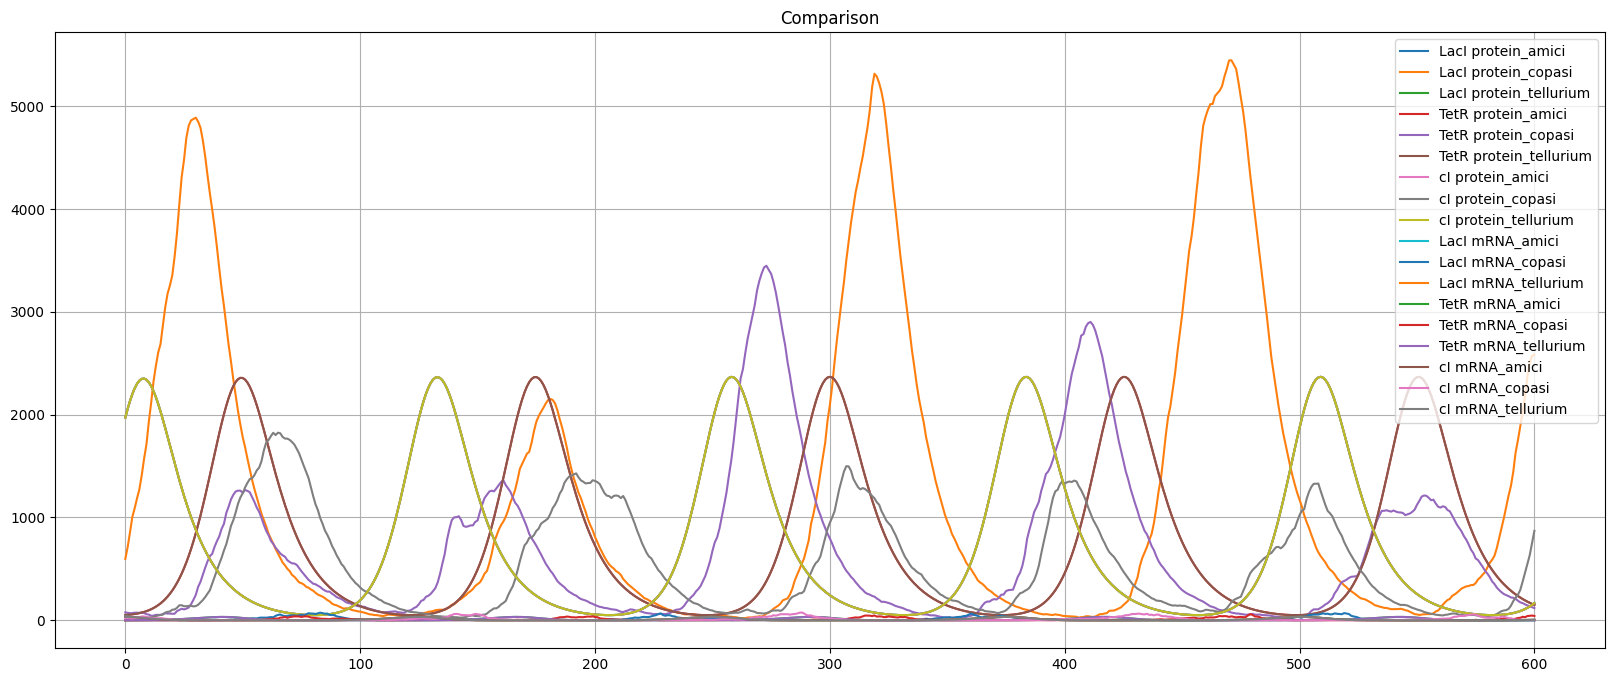

In [18]:
visualize(test_data)

In [41]:
for i, v in enumerate({'a': 3, 'b': 4, 'c': 5, 'd': 6, 'e': 7}.items()):
    k = v[0]
    val = v[1]
    print(k, val)

a 3
b 4
c 5
d 6
e 7


In [38]:
def visualize(data: dict):
    """Visualize simulation output data, not comparison data, with subplots for each species."""
    species_names = list(data['content']['results']['results'].keys())
    num_species = len(species_names)
    
    fig, axes = plt.subplots(nrows=num_species, ncols=3, figsize=(20, 6 * num_species))  # Adjust the size as needed
    
    if num_species == 1:
        axes = [axes]
    
    for ax, species_name in zip(axes, species_names):
        species_data = data['content']['results']['results'][species_name]
        output_data = species_data.get('output_data')
        if output_data:  # here update for grid!
            for i, simulator_name in output_data.keys():
                sns.lineplot(ax=ax, data=simulator_output, label=f"{simulator_name}")
            ax.set_title(f"{species_name} Simulation Outputs")
            ax.legend()
            # ax.grid(True)
    
    plt.tight_layout()
    plt.show()

In [31]:
def visualize(data: dict):
    """Visualize simulation output data, not comparison data, with subplots for each species."""
    species_names = list(data['content']['results']['results'].keys())
    num_species = len(species_names)
    
    fig, axes = plt.subplots(nrows=num_species, figsize=(20, 6 * num_species))  # Adjust the size as needed
    
    if num_species == 1:
        axes = [axes]
    
    for ax, species_name in zip(axes, species_names):
        species_data = data['content']['results']['results'][species_name]
        output_data = species_data.get('output_data')
        if output_data:
            for simulator_name, simulator_output in output_data.items():
                if simulator_name == 'amici':
                    sns.lineplot(ax=ax, data=simulator_output, label=f"{simulator_name}")
            ax.set_title(f"{species_name} Simulation Outputs")
            ax.legend()
            # ax.grid(True)
    
    plt.tight_layout()
    plt.show()

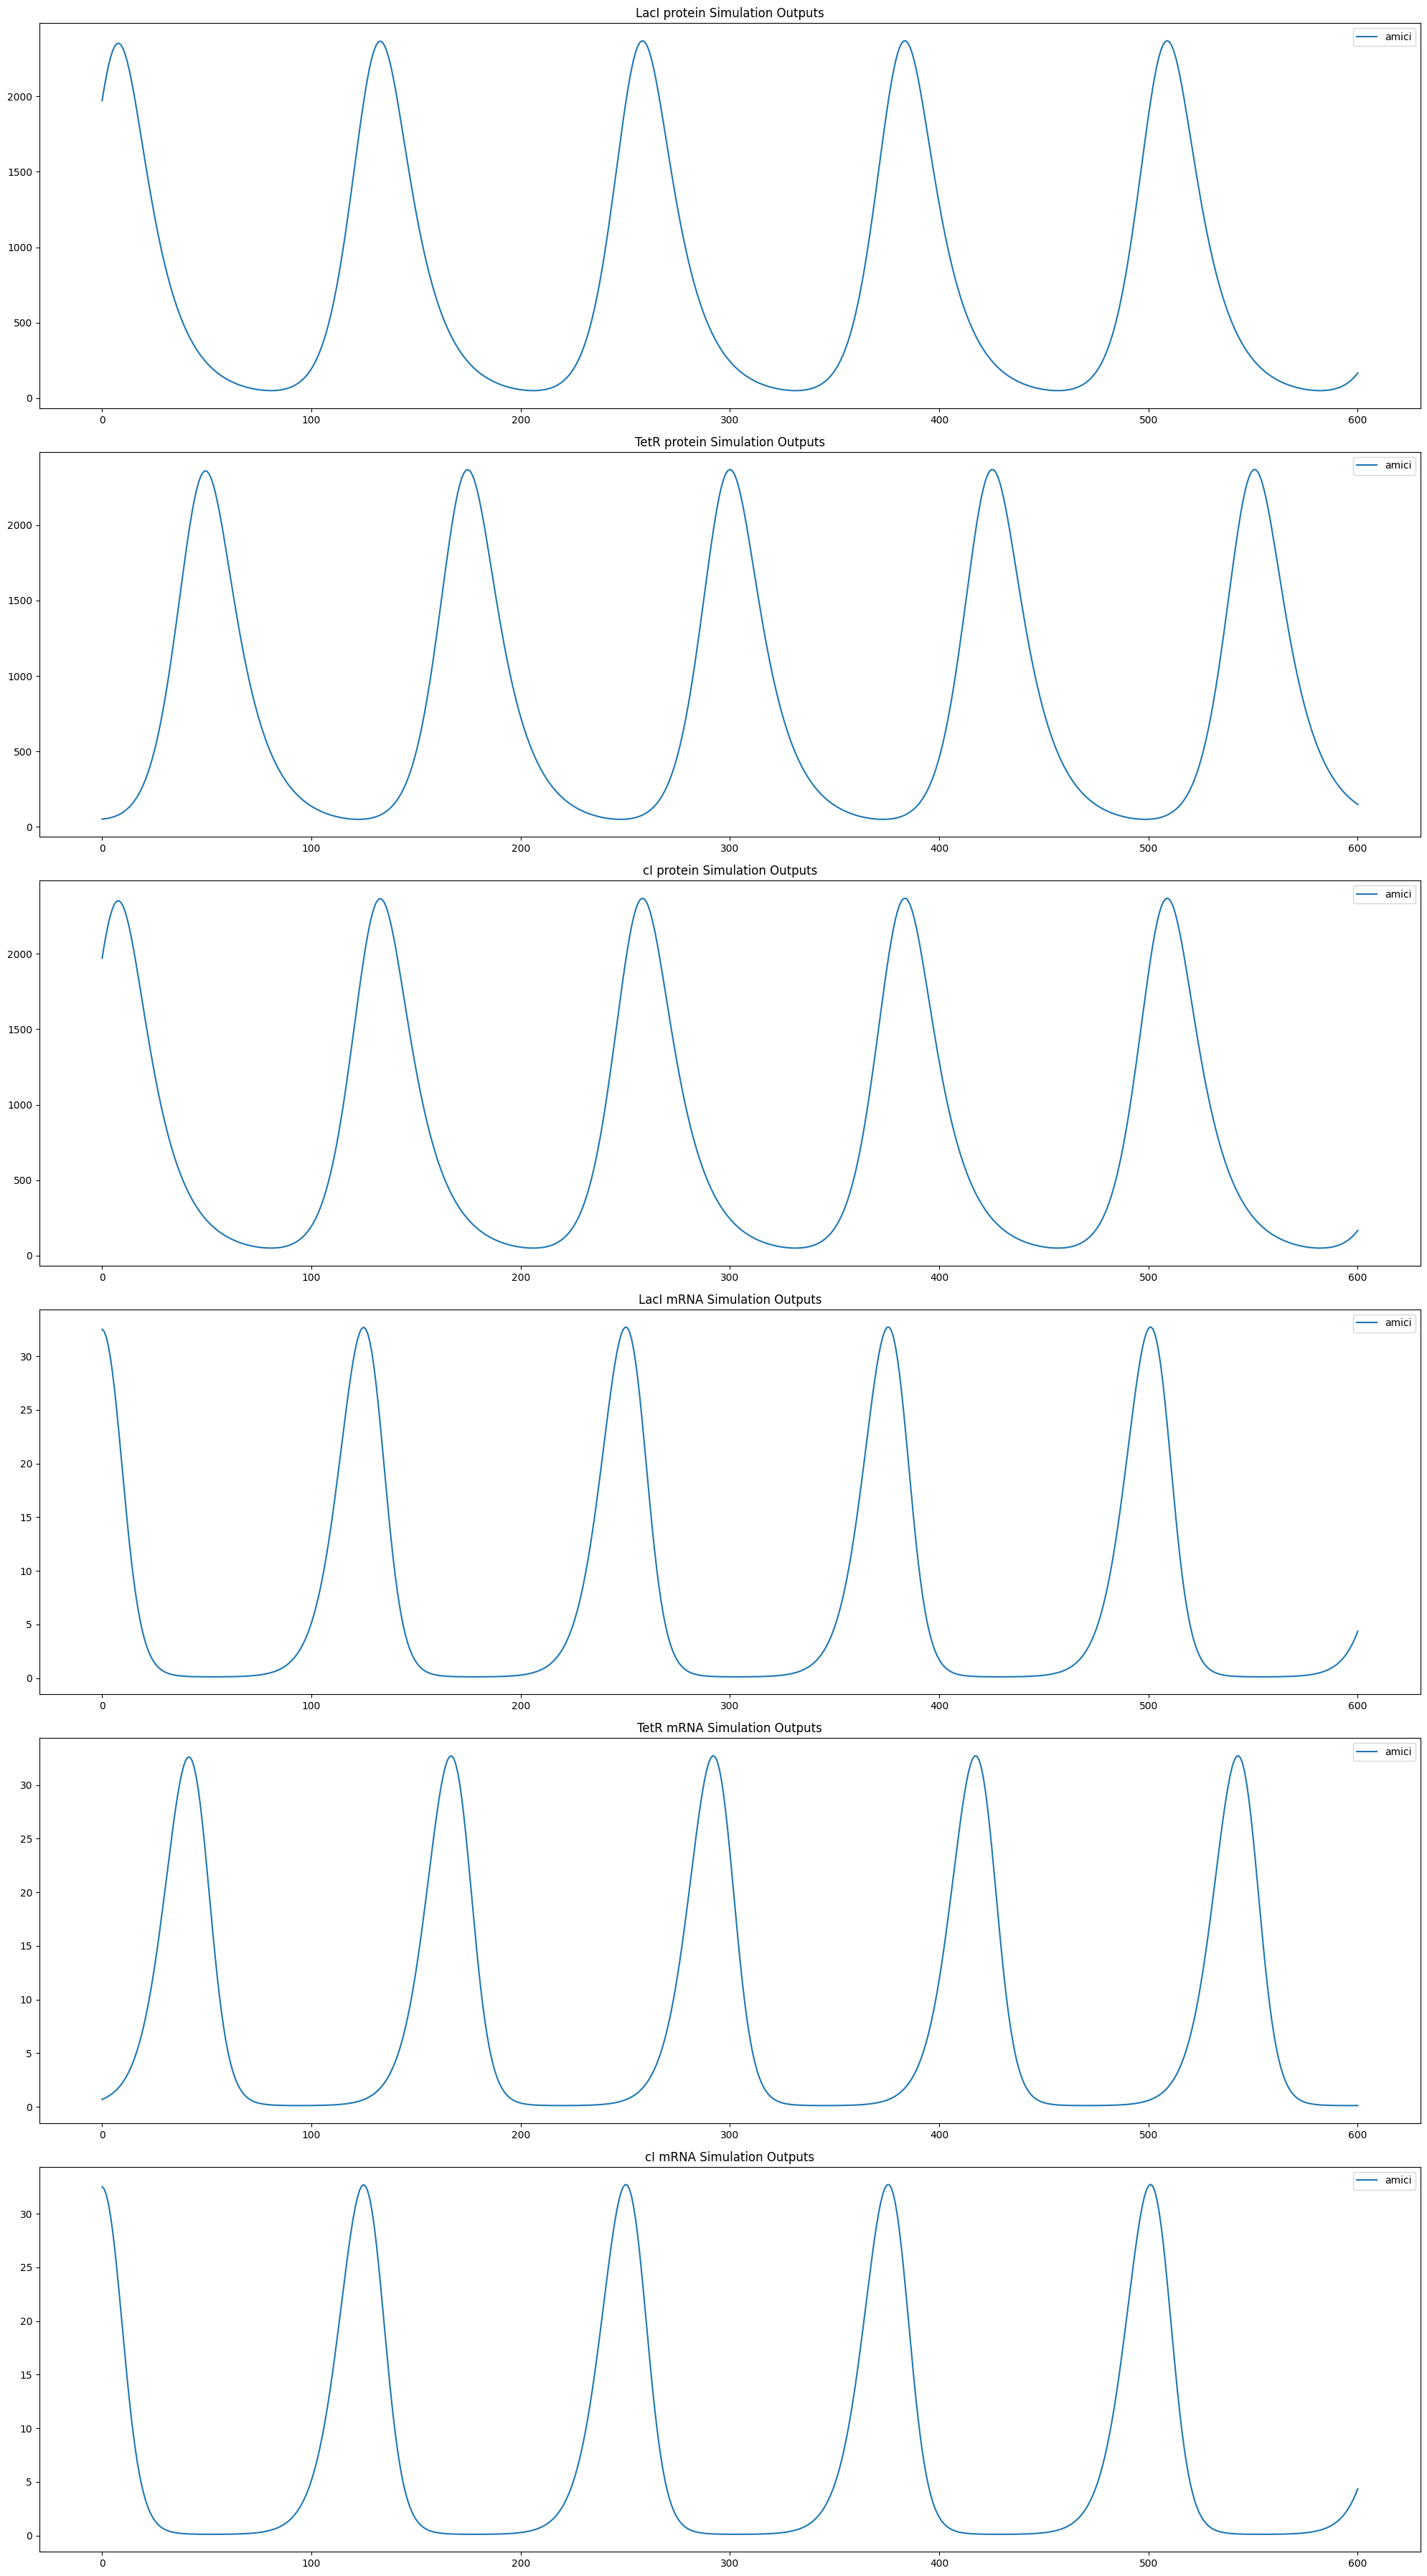

In [32]:
visualize(test_data)